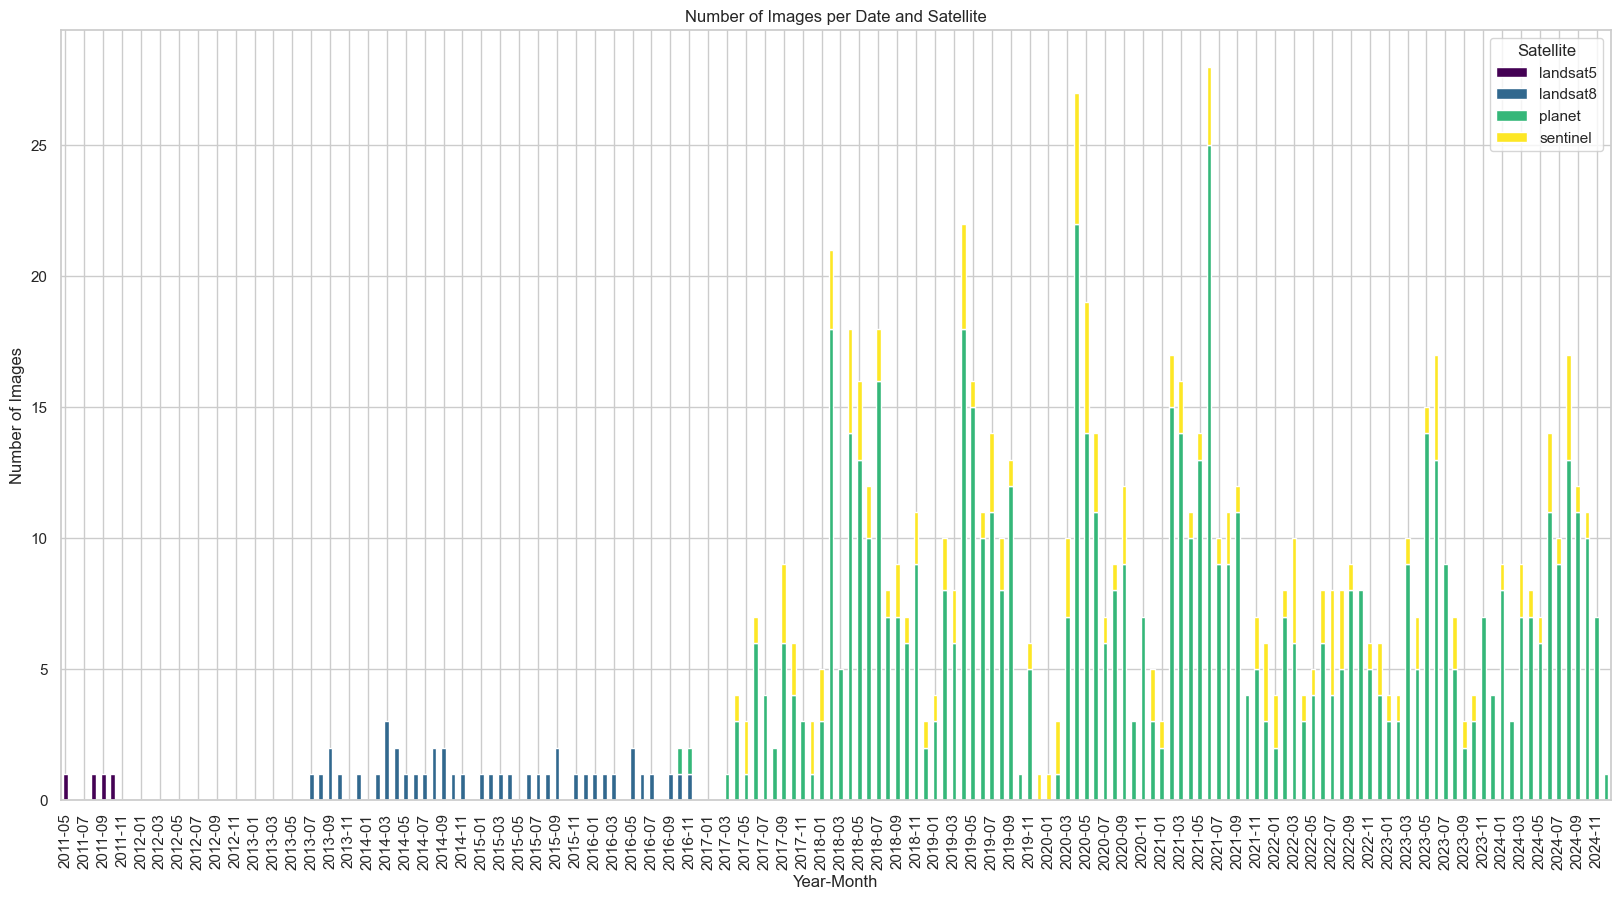

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 4 csv files
landsat5 = pd.read_csv('../data/Satellite_Collections_Raw/dates.csv')
landsat5['satellite'] = 'landsat5'
landsat8 = pd.read_csv('../data/Satellite_Collections_Raw/dates2.csv')
landsat8['satellite'] = 'landsat8'
sentinel = pd.read_csv('../data/Satellite_Collections_Raw/dates3.csv')
sentinel['satellite'] = 'sentinel'
planet = pd.read_csv('../data/Satellite_Collections_Raw/image_timestamps.csv')
planet.rename(columns={'timestamp': 'date'}, inplace=True)
planet['satellite'] = 'planet'
planet['date'] = pd.to_datetime(planet['date'])

# Combine the 4 dataframes into one
df = pd.concat([landsat5, landsat8, sentinel, planet])

# Set the same format for the date column
df['date'] = pd.to_datetime(df['date'])

# Create new columns for year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year, month, and satellite
grouped = df.groupby(['year', 'month', 'satellite']).size().reset_index(name='count')

# Create a new column for year-month
grouped['year_month'] = pd.to_datetime(grouped['year'].astype(str) + '-' + grouped['month'].astype(str).str.zfill(2) + '-01')

# Create a complete date range for all months within the range of your data
all_months = pd.date_range(start=grouped['year_month'].min(), end=grouped['year_month'].max(), freq='MS')

# Reindex the grouped DataFrame to include all months
pivot_df = grouped.pivot_table(index='year_month', columns='satellite', values='count', fill_value=0).reindex(all_months).fillna(0)

# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')
ax.set_title('Number of Images per Date and Satellite')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Images')
# Set x-ticks to show every two months
ticks_to_show = range(0, len(pivot_df.index), 2)
ax.set_xticks(ticks_to_show)
ax.set_xticklabels(pivot_df.index.strftime('%Y-%m')[ticks_to_show], rotation=90)

ax.legend(title='Satellite')
plt.show()